In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from pandas.api.types import CategoricalDtype

# pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

# Loading Dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print("Training data shape: ", train.shape)
print("Testing data shape: ", test.shape)

Training data shape:  (1460, 81)
Testing data shape:  (1459, 80)


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1. Variable identification

__SalePrice__ is the target variable and the rest are the __predcitor variable__.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Determining count of different data types columns

In [5]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
boolean_dtypes = ['bool']
print("Number of numerical data types: ", len(train.select_dtypes(include = numeric_dtypes).columns))
print("Number of boolean data types: ", len(train.select_dtypes(include = 'bool').columns))
print("Number of object data types: ", len(train.select_dtypes(include = 'object').columns))

Number of numerical data types:  38
Number of boolean data types:  0
Number of object data types:  43


# 2.1 Univariate Analysis of numerical variables

Function to find the skewness and kurtosis

In [6]:
list_columns_to_be_dropped_from_test = []

In [7]:
global measure_columns_spread_df, list_of_columns_with_null_values
list_of_columns_with_null_values = []
measure_columns_spread_df = pd.DataFrame(columns = ['col_name', 'skewness', 'kurtosis', 'transformation_reqd', 'null_values'])
def collect_calculate_col_spread(df, col):
    global measure_columns_spread_df
    temp = pd.DataFrame(pd.Series([col, df[col].skew(), df[col].kurt(), np.nan, np.nan])).T
    temp.columns = ['col_name', 'skewness', 'kurtosis', 'transformation_reqd', 'null_values']
    condition = (df[col].skew() < -1) | (df[col].skew() > 1) | (df[col].kurt() < -1) | ((df[col].kurt() > 1))
    temp.loc[0,'transformation_reqd']=np.where(condition, 'Yes', 'No')
    temp.loc[0, 'null_values'] = np.where(df[col].isnull().sum(), 'Present', 'Absent')
    if (df[col].isnull().sum()):
        list_of_columns_with_null_values.append(col)
    print("Count of null values in train dataset: ", df[col].isnull().sum())
    measure_columns_spread_df = pd.concat([measure_columns_spread_df, temp], ignore_index = True)

Function to do univariate analysis for numerical variable

In [8]:
def univariate_numerical_analysis(df, col):
    collect_calculate_col_spread(df, col)
    fig, axs = plt.subplots(2,1, figsize = (10,9));
    sns.distplot(train[col], ax = axs[0]);
    axs[0].set_title("Histogram of " + col);
    axs[1].set_title("Boxplot of " + col);
    sns.boxplot(train[col], ax = axs[1]);
    title=("Skewness of {}: ".format(col) + "{0:.2f}".format(train[col].skew()) + " and " + "Kurtosis of {}: ".format(col) 
           +"{0:.2f}".format(train[col].kurt()))
    fig.suptitle(title, y = 1.01);
    plt.tight_layout(); 
    plt.show();

In [9]:
train.select_dtypes(include = numeric_dtypes).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Univariate Analysis for numerical variables

Count of null values in train dataset:  0


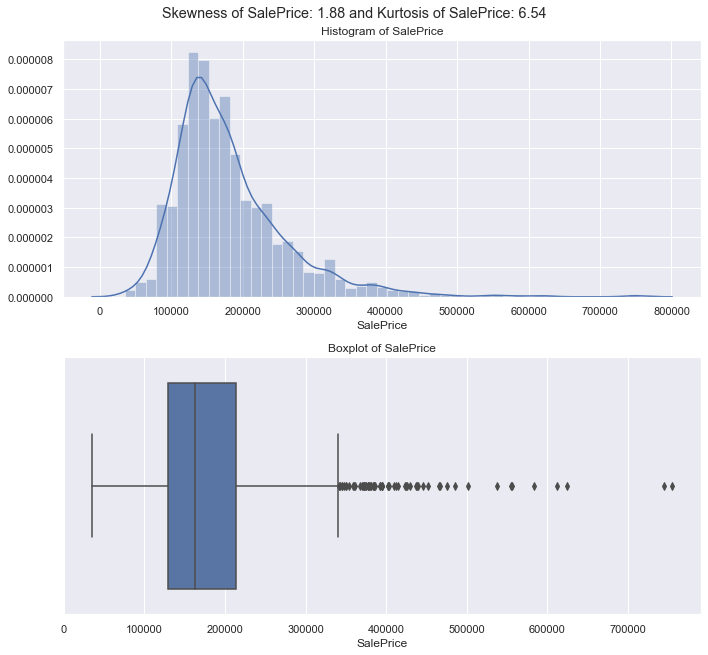

In [10]:
univariate_numerical_analysis(train, 'SalePrice')

#### MSSubClass

Count of null values in train dataset:  0


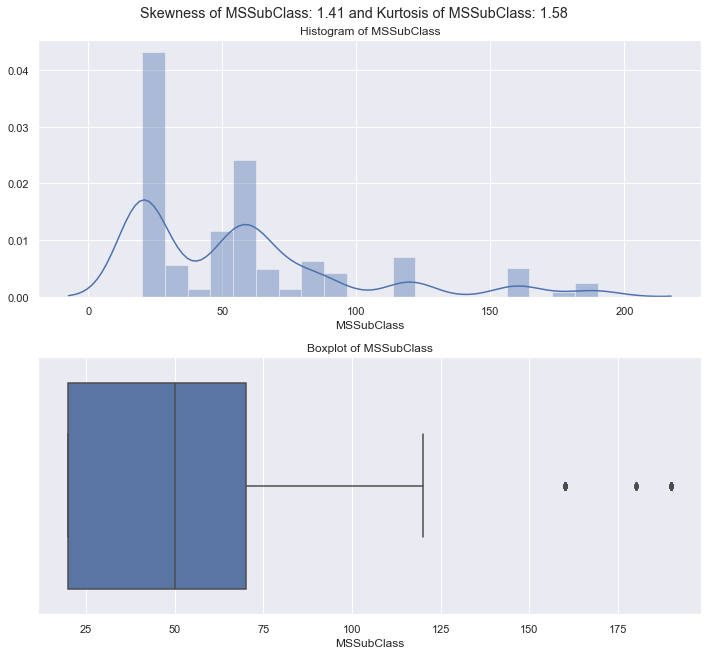

In [11]:
univariate_numerical_analysis(train, 'MSSubClass')

In [12]:
train['MSSubClass'].value_counts(dropna = False)

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

#### LotFrontage

Count of null values in train dataset:  259


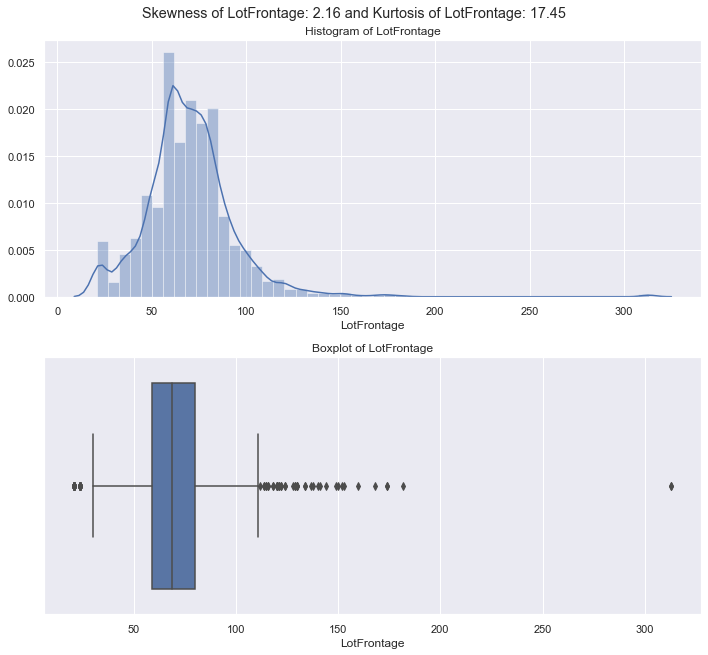

In [13]:
univariate_numerical_analysis(train, 'LotFrontage')

#### LotArea

Count of null values in train dataset:  0


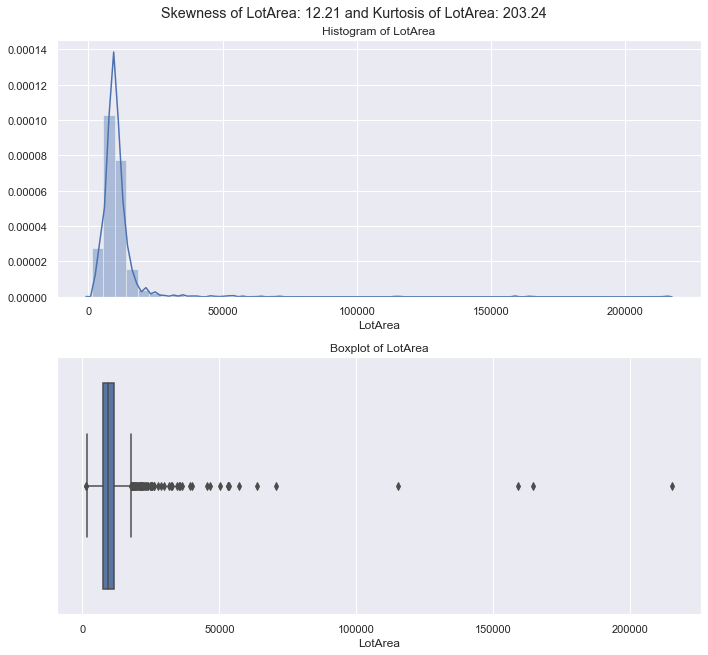

In [14]:
univariate_numerical_analysis(train, 'LotArea')

#### OverallQual



In [15]:
train['OverallQual'].value_counts(dropna=  False)

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

#### OverallCond


In [16]:
train['OverallCond'].value_counts(dropna = False)

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

#### YearBuilt

Original construction date

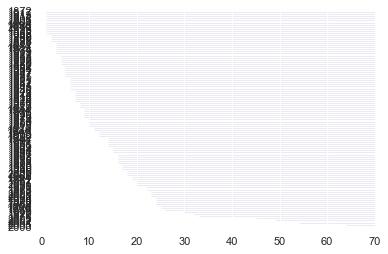

In [17]:
train['YearBuilt'].value_counts(dropna = False).plot(kind = 'barh');

Count of null values in train dataset:  0


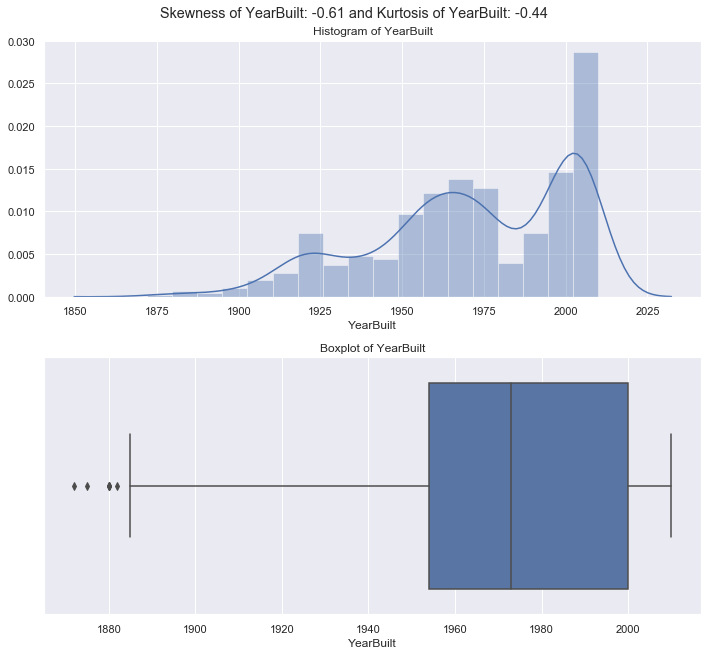

In [18]:
univariate_numerical_analysis(train, 'YearBuilt')

In [19]:
train['YearBuilt'].min(), train['YearBuilt'].max()

(1872, 2010)

#### YearRemodAdd
Remodel date

Count of null values in train dataset:  0


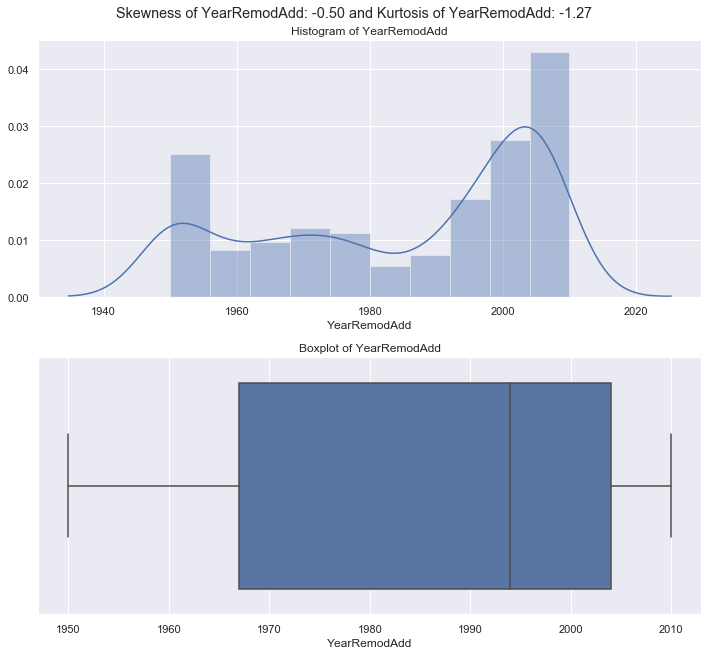

In [20]:
univariate_numerical_analysis(train, 'YearRemodAdd')

#### MasVnrArea
Masonry veneer area in square feet


Count of null values in train dataset:  8


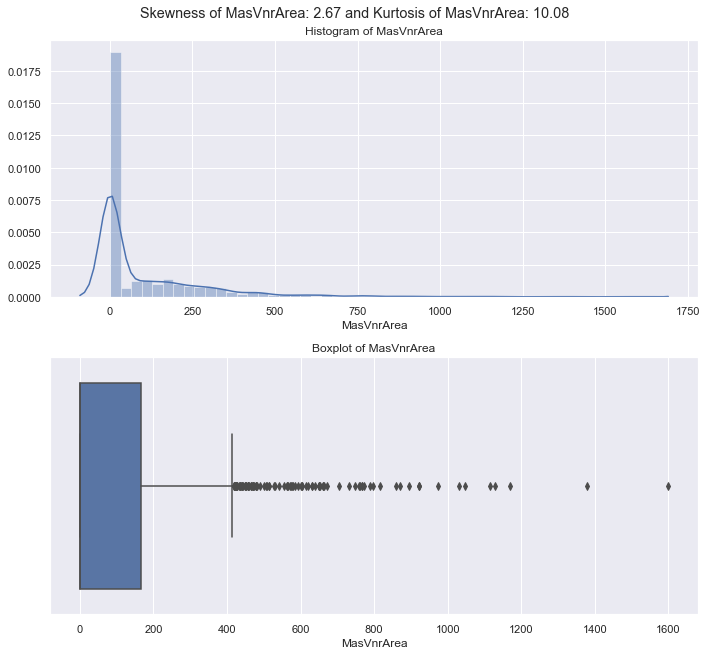

In [21]:
univariate_numerical_analysis(train, 'MasVnrArea')

#### BsmtFinSF1

Type 1 finished square feet

Count of null values in train dataset:  0


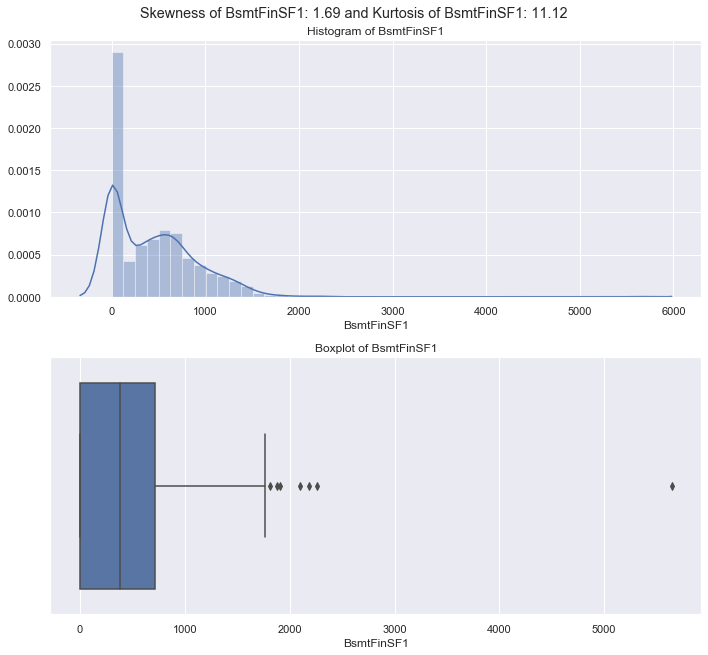

In [22]:
univariate_numerical_analysis(train, 'BsmtFinSF1')

#### BsmtFinSF2

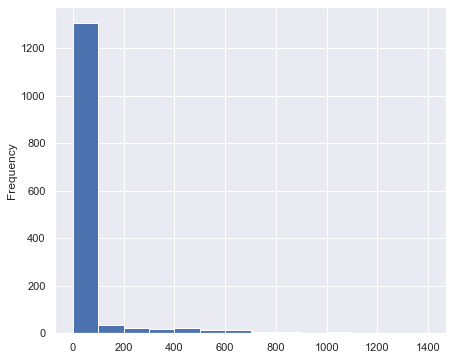

In [23]:
train['BsmtFinSF2'].plot(kind= 'hist', figsize = (7,6), bins = np.arange(0, train['BsmtFinSF2'].max(),100));

In [24]:
train['BsmtFinSF2'].unique()

array([   0,   32,  668,  486,   93,  491,  506,  712,  362,   41,  169,
        869,  150,  670,   28, 1080,  181,  768,  215,  374,  208,  441,
        184,  279,  306,  180,  580,  690,  692,  228,  125, 1063,  620,
        175,  820, 1474,  264,  479,  147,  232,  380,  544,  294,  258,
        121,  391,  531,  344,  539,  713,  210,  311, 1120,  165,  532,
         96,  495,  174, 1127,  139,  202,  645,  123,  551,  219,  606,
        612,  480,  182,  132,  336,  468,  287,   35,  499,  723,  119,
         40,  117,  239,   80,  472,   64, 1057,  127,  630,  128,  377,
        764,  345, 1085,  435,  823,  500,  290,  324,  634,  411,  841,
       1061,  466,  396,  354,  149,  193,  273,  465,  400,  682,  557,
        230,  106,  791,  240,  547,  469,  177,  108,  600,  492,  211,
        168, 1031,  438,  375,  144,   81,  906,  608,  276,  661,   68,
        173,  972,  105,  420,  546,  334,  352,  872,  110,  627,  163,
       1029], dtype=int64)

In [25]:
train['BsmtFinSF2'].isnull().sum()

0

#### BsmtUnfSF

Unfinished Basement

Count of null values in train dataset:  0


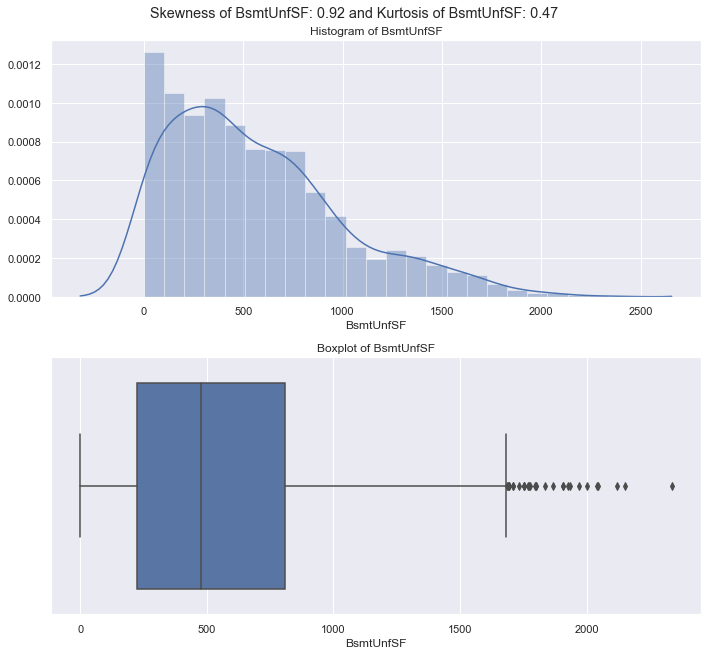

In [26]:
univariate_numerical_analysis(train, 'BsmtUnfSF')

#### TotalBsmtSF
Total sq feet area of basement

Count of null values in train dataset:  0


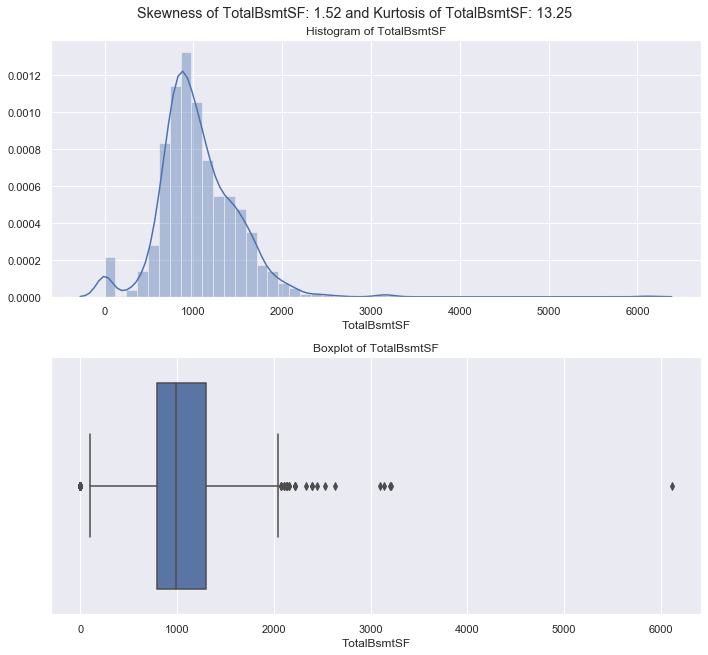

In [27]:
univariate_numerical_analysis(train, 'TotalBsmtSF')

In [28]:
train.loc[train['TotalBsmtSF']==0,'TotalBsmtSF'].value_counts()

0    37
Name: TotalBsmtSF, dtype: int64

#### 1stFlrSF

first floor sq feet

Count of null values in train dataset:  0


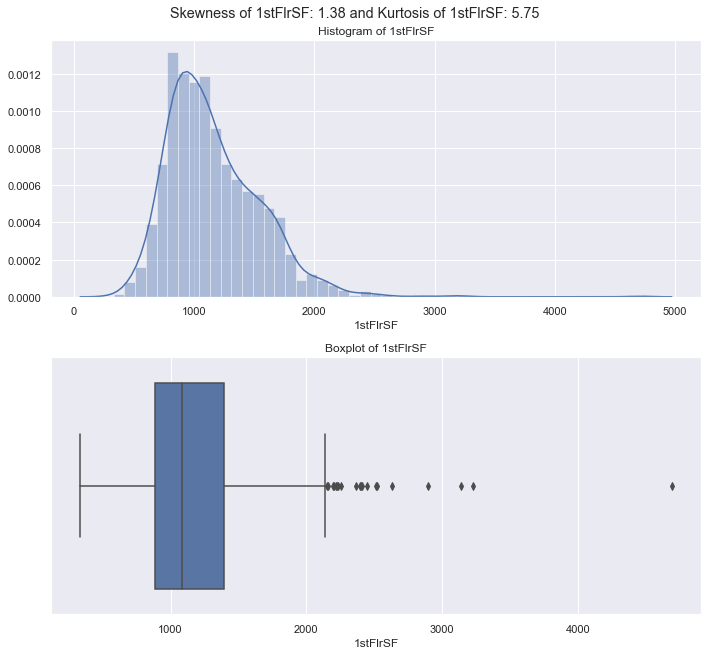

In [29]:
univariate_numerical_analysis(train, '1stFlrSF')

#### 2ndFlrSF

seconf floor sq feet

Count of null values in train dataset:  0


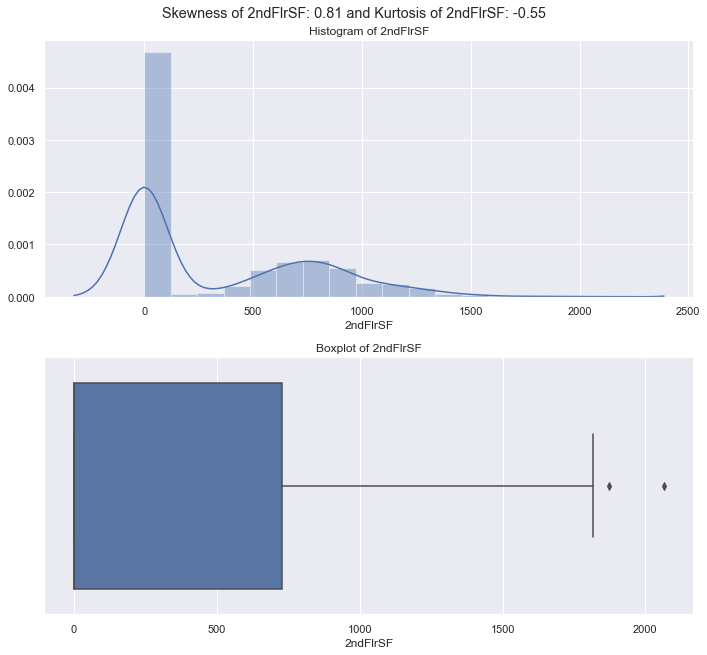

In [30]:
univariate_numerical_analysis(train, '2ndFlrSF')

#### LowQualFinSF

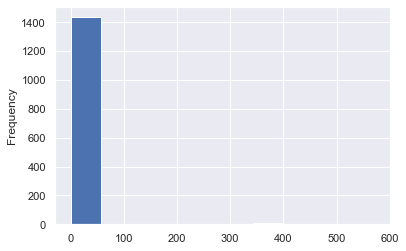

In [31]:
col = 'LowQualFinSF'
train[col].plot(kind= 'hist');

In [32]:
train[col].unique()

array([  0, 360, 513, 234, 528, 572, 144, 392, 371, 390, 420, 473, 156,
       515,  80,  53, 232, 481, 120, 514, 397, 479, 205, 384], dtype=int64)

#### GrLivArea

Count of null values in train dataset:  0


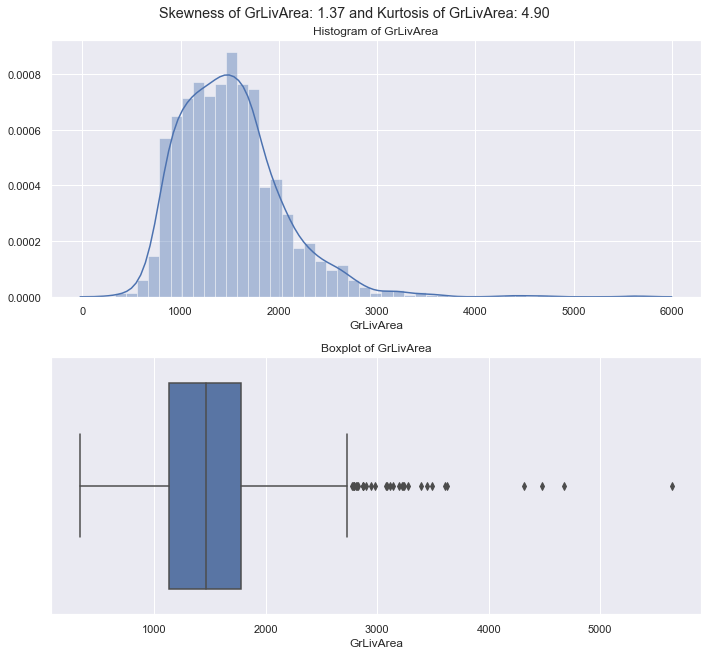

In [33]:
univariate_numerical_analysis(train,'GrLivArea')

#### BsmtFullBath

In [34]:
train['BsmtFullBath'].unique()

array([1, 0, 2, 3], dtype=int64)

In [35]:
train['BsmtFullBath'].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

#### BsmtHalfBath

In [36]:
train['BsmtHalfBath'].unique()

array([0, 1, 2], dtype=int64)

In [37]:
train['BsmtHalfBath'].value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

#### FullBath

In [38]:
train['FullBath'].unique()

array([2, 1, 3, 0], dtype=int64)

In [39]:
train['HalfBath'].unique()

array([1, 0, 2], dtype=int64)

#### HalfBath

In [40]:
train['HalfBath'].unique()

array([1, 0, 2], dtype=int64)

In [41]:
train['HalfBath'].value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

#### BedroomAbvGr

In [42]:
train['BedroomAbvGr'].unique()

array([3, 4, 1, 2, 0, 5, 6, 8], dtype=int64)

In [43]:
train['BedroomAbvGr'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

#### KitchenAbvGr

In [44]:
train['KitchenAbvGr'].unique()

array([1, 2, 3, 0], dtype=int64)

In [45]:
train['KitchenAbvGr'].value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

#### TotRmsAbvGrd

In [46]:
train['TotRmsAbvGrd'].unique()

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14], dtype=int64)

In [47]:
train['TotRmsAbvGrd'].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

#### Fireplaces

In [48]:
train['Fireplaces'].unique()

array([0, 1, 2, 3], dtype=int64)

In [49]:
train['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

#### GarageYrBlt

In [50]:
train['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [51]:
len(train['GarageYrBlt'][train['GarageYrBlt'].isnull()])

81

In this case NAs might imply that for those houses there are no garages availabe or the year when it was built might not be available so filling these values might lead to addition of wrong info to the data.

#### GarageCars

    Size of garage in car capacity

In [52]:
train['GarageCars'].unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [53]:
train['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

#### GarageArea
Size of garage in sq feet

Count of null values in train dataset:  0


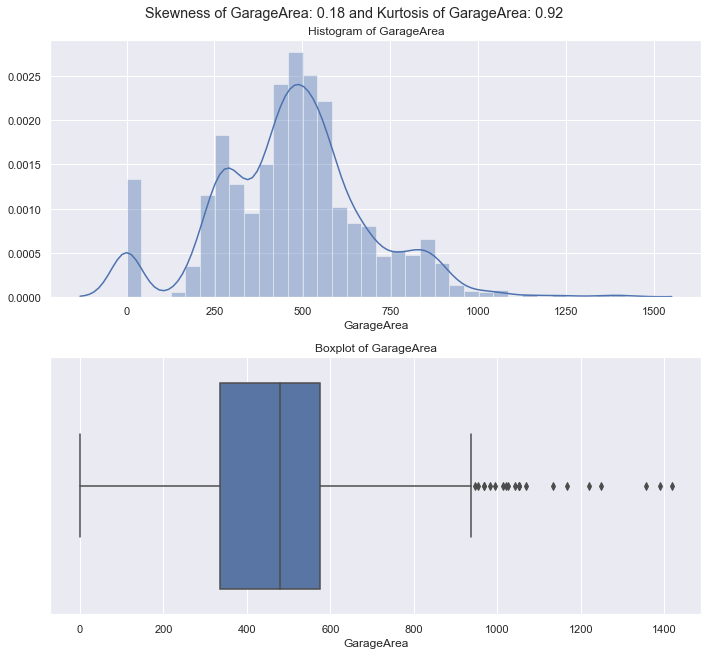

In [54]:
univariate_numerical_analysis(train, 'GarageArea')

In [55]:
train['GarageArea'].value_counts()[:5]

0      81
440    49
576    47
240    38
484    34
Name: GarageArea, dtype: int64

Skewness lies within the desired range but issue is with kurtosis.

#### WoodDeckSF

Count of null values in train dataset:  0


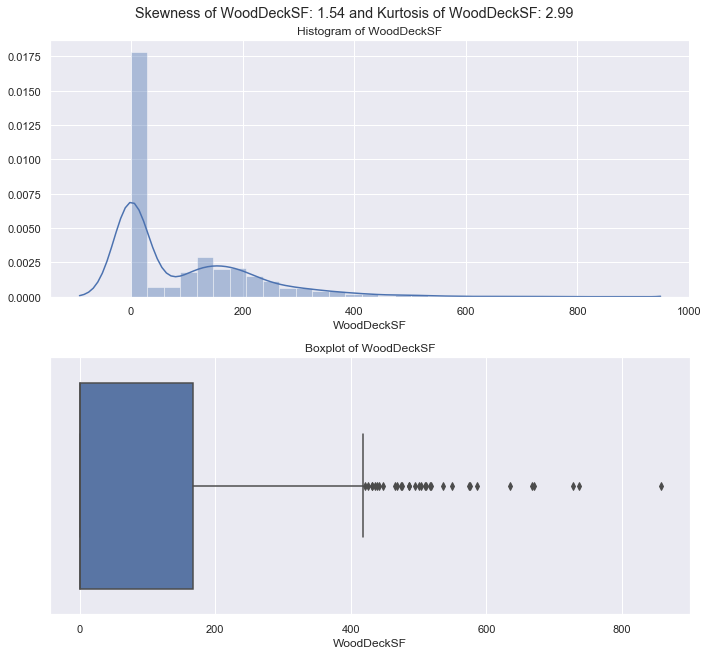

In [56]:
univariate_numerical_analysis(train, 'WoodDeckSF')

#### OpenPorchSF

Count of null values in train dataset:  0


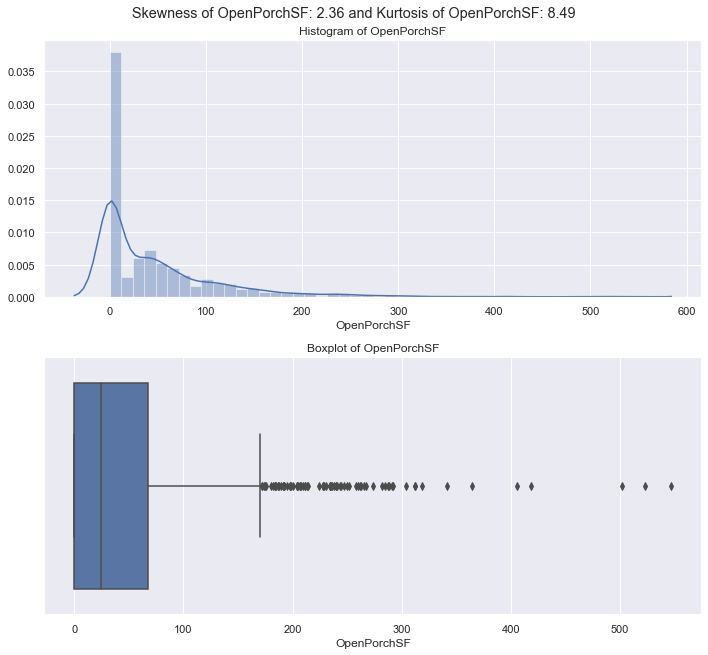

In [57]:
univariate_numerical_analysis(train, 'OpenPorchSF')

In [58]:
train['OpenPorchSF'].unique()

array([ 61,   0,  42,  35,  84,  30,  57, 204,   4,  21,  33, 213, 112,
       102, 154, 159, 110,  90,  56,  32,  50, 258,  54,  65,  38,  47,
        64,  52, 138, 104,  82,  43, 146,  75,  72,  70,  49,  11,  36,
       151,  29,  94, 101, 199,  99, 234, 162,  63,  68,  46,  45, 122,
       184, 120,  20,  24, 130, 205, 108,  80,  66,  48,  25,  96, 111,
       106,  40, 114,   8, 136, 132,  62, 228,  60, 238, 260,  27,  74,
        16, 198,  26,  83,  34,  55,  22,  98, 172, 119, 208, 105, 140,
       168,  28,  39, 148,  12,  51, 150, 117, 250,  10,  81,  44, 144,
       175, 195, 128,  76,  17,  59, 214, 121,  53, 231, 134, 192, 123,
        78, 187,  85, 133, 176, 113, 137, 125, 523, 100, 285,  88, 406,
       155,  73, 182, 502, 274, 158, 142, 243, 235, 312, 124, 267, 265,
        87, 288,  23, 152, 341, 116, 160, 174, 247, 291,  18, 170, 156,
       166, 129, 418, 240,  77, 364, 188, 207,  67,  69, 131, 191,  41,
       118, 252, 189, 282, 135,  95, 224, 169, 319,  58,  93, 24

#### EnclosedPorch

In [59]:
train['EnclosedPorch'].unique()

array([  0, 272, 228, 205, 176,  87, 172, 102,  37, 144,  64, 114, 202,
       128, 156,  44,  77, 192, 140, 180, 183,  39, 184,  40, 552,  30,
       126,  96,  60, 150, 120, 112, 252,  52, 224, 234, 244, 268, 137,
        24, 108, 294, 177, 218, 242,  91, 160, 130, 169, 105,  34, 248,
       236,  32,  80, 115, 291, 116, 158, 210,  36, 200,  84, 148, 136,
       240,  54, 100, 189, 293, 164, 216, 239,  67,  90,  56, 129,  98,
       143,  70, 386, 154, 185, 134, 196, 264, 275, 230, 254,  68, 194,
       318,  48,  94, 138, 226, 174,  19, 170, 220, 214, 280, 190, 330,
       208, 145, 259,  81,  42, 123, 162, 286, 168,  20, 301, 198, 221,
       212,  50,  99], dtype=int64)

In [60]:
train['EnclosedPorch'].skew()

3.08987190371177

In [61]:
train['EnclosedPorch'].kurt()

10.430765944030428

#### 3SsnPorch

In [62]:
train['3SsnPorch'].unique()

array([  0, 320, 407, 130, 180, 168, 140, 508, 238, 245, 196, 144, 182,
       162,  23, 216,  96, 153, 290, 304], dtype=int64)

In [63]:
train['3SsnPorch'].value_counts()

0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
162       1
153       1
320       1
140       1
130       1
96        1
23        1
508       1
Name: 3SsnPorch, dtype: int64

#### ScreenPorch

In [64]:
train['ScreenPorch'].unique()

array([  0, 176, 198, 291, 252,  99, 184, 168, 130, 142, 192, 410, 224,
       266, 170, 154, 153, 144, 128, 259, 160, 271, 234, 374, 185, 182,
        90, 396, 140, 276, 180, 161, 145, 200, 122,  95, 120,  60, 126,
       189, 260, 147, 385, 287, 156, 100, 216, 210, 197, 204, 225, 152,
       175, 312, 222, 265, 322, 190, 233,  63,  53, 143, 273, 288, 263,
        80, 163, 116, 480, 178, 440, 155, 220, 119, 165,  40], dtype=int64)

In [65]:
train['ScreenPorch'].skew()

4.122213743143115

In [66]:
train['ScreenPorch'].kurt()

18.43906784486968

#### PoolArea

In [67]:
train['PoolArea'].unique()

array([  0, 512, 648, 576, 555, 480, 519, 738], dtype=int64)

In [68]:
train['PoolArea'].skew()

14.828373640750588

In [69]:
train['PoolArea'].kurt()

223.2684989181717

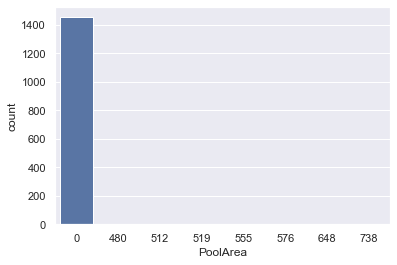

In [70]:
sns.countplot(data = train, x = 'PoolArea')

#### MiscVal

In [71]:
train['MiscVal'].unique()

array([    0,   700,   350,   500,   400,   480,   450, 15500,  1200,
         800,  2000,   600,  3500,  1300,    54,   620,   560,  1400,
        8300,  1150,  2500], dtype=int64)

In [72]:
train['MiscVal'].skew()

24.476794188821916

In [73]:
train['MiscVal'].kurt()

701.0033422801193

#### MoSold

In [74]:
train['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

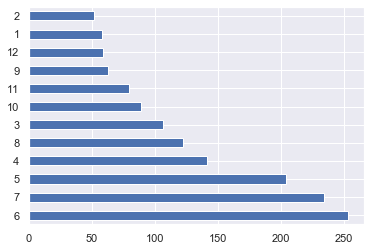

In [75]:
train['MoSold'].value_counts().plot(kind='barh')

Most of the sales happen during the months of May-July

#### YrSold

In [76]:
train['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

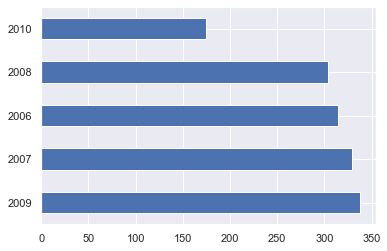

In [77]:
train['YrSold'].value_counts().plot(kind = 'barh')

There was a drastic reduction in the houses sold during the year 2010

## 2.1.a. Data wrangling to do after univariate analysis

#### 1 Numerical variable to be converted into nominal category type.

Checking for presence of null values in train and test data

In [78]:
train.loc[:,['MSSubClass','BsmtHalfBath','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr']].isnull().sum()

MSSubClass      0
BsmtHalfBath    0
BsmtFullBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
dtype: int64

In [79]:
test.loc[:,['MSSubClass','BsmtHalfBath','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr']].isnull().sum()

MSSubClass      0
BsmtHalfBath    2
BsmtFullBath    2
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
dtype: int64

In [80]:
train['BsmtHalfBath'].value_counts()[0]

1378

Filling the NA values

In [81]:
for col in ['BsmtHalfBath','BsmtFullBath']:
    test[col] = test[col].fillna(train[col].value_counts()[0])

Converting to nominal category

In [82]:
for col in ['MSSubClass', 'BsmtHalfBath', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr']:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

#### 3.3 List of numerical columns which have NA values

In [83]:
list_of_columns_with_null_values

['LotFrontage', 'MasVnrArea']

In [84]:
# check for presence of columns in train
train[['LotFrontage', 'MasVnrArea']].isnull().sum()

LotFrontage    259
MasVnrArea       8
dtype: int64

In [85]:
# check for presence of columns in test
test[['LotFrontage', 'MasVnrArea']].isnull().sum()

LotFrontage    227
MasVnrArea      15
dtype: int64

In [86]:
for col in ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']:
    train[col] = train[col].fillna(train[col].median())
    test[col] = train[col].fillna(train[col].median())

CHecking for presence of null values in numerical columns of train and test sets

In [87]:
train[train.select_dtypes(include = numeric_dtypes).columns.to_list()].isnull().sum().sum()

0

In [88]:
test[test.select_dtypes(include = numeric_dtypes).columns.to_list()].isnull().sum()[
    test[test.select_dtypes(include = numeric_dtypes).columns.to_list()].isnull().sum()!=0].index.to_list()

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageCars',
 'GarageArea']

In [89]:
for col in ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageCars','GarageArea']:
    test[col] = test[col].fillna(train[col].median())

In [90]:
test[test.select_dtypes(include = numeric_dtypes).columns.to_list()].isnull().sum().sum()

0

## 2.2 Univariate analysis of categorical variables

In [91]:
object_category_columns = ['category', 'object']
train.select_dtypes(include = object_category_columns).columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [92]:
global list_of_object_category_columns_with_null_values
list_of_object_category_columns_with_null_values = []
def univariate_category_analysis(train, col):
    print('Number of null values in {} is: {}'.format(col, train[col].isnull().sum()))
    if (train[col].isnull().sum()):
        list_of_object_category_columns_with_null_values.append(col)
    (train[col].value_counts(dropna = False, normalize = True)*100).plot(kind = 'barh');
    plt.xlabel('Count %ge');
    plt.ylabel(col);
    plt.show();

Number of null values in MSSubClass is: 0


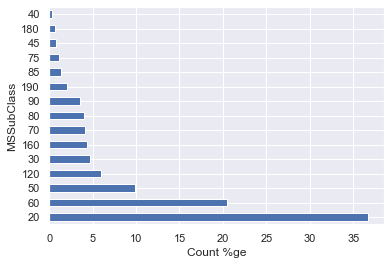

In [93]:
univariate_category_analysis(train, 'MSSubClass')

#### MSZoning

Number of null values in MSZoning is: 0


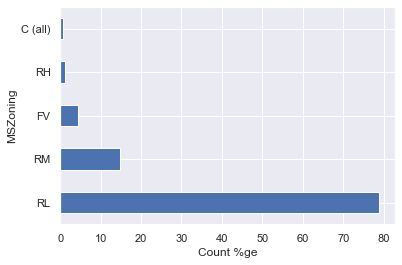

In [94]:
univariate_category_analysis(train, 'MSZoning')

#### Street

Number of null values in Street is: 0


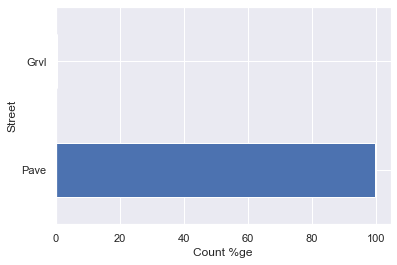

In [95]:
univariate_category_analysis(train, 'Street')

#### Alley

Number of null values in Alley is: 1369


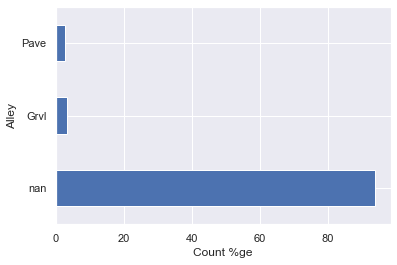

In [96]:
univariate_category_analysis(train, 'Alley')

#### LotShape

Number of null values in LotShape is: 0


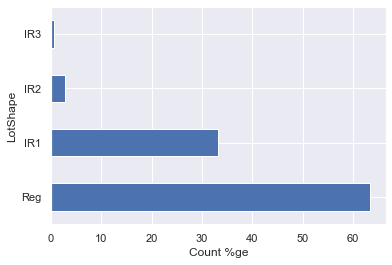

In [97]:
univariate_category_analysis(train, 'LotShape')

#### Utilities

Number of null values in Utilities is: 0


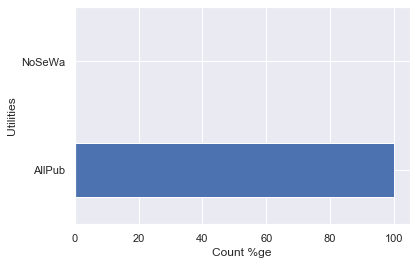

In [98]:
univariate_category_analysis(train, 'Utilities')

#### Utilities

Number of null values in Utilities is: 0


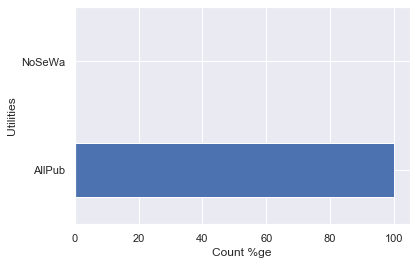

In [99]:
univariate_category_analysis(train, 'Utilities')

#### LotConfig

Number of null values in LotConfig is: 0


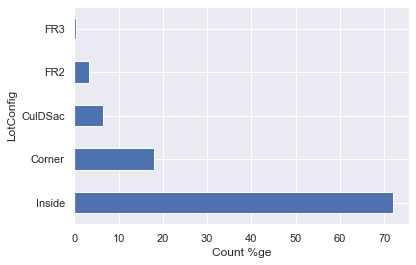

In [100]:
univariate_category_analysis(train, 'LotConfig')

#### LandSlope

Number of null values in LandSlope is: 0


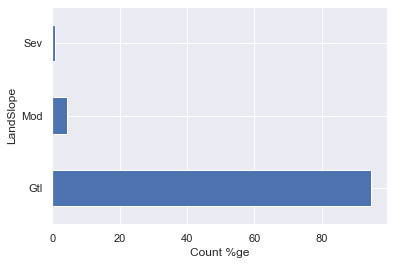

In [101]:
univariate_category_analysis(train, 'LandSlope')

#### Neighborhood

Number of null values in Neighborhood is: 0


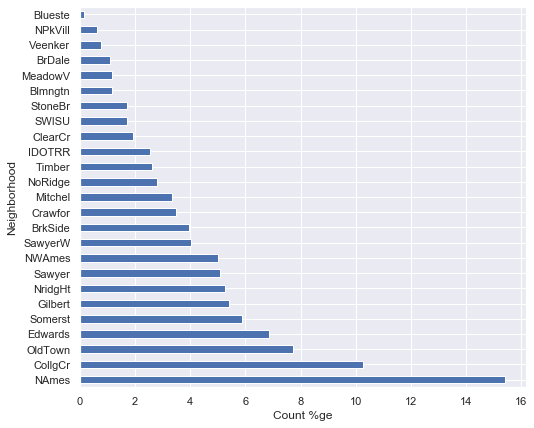

In [102]:
plt.figure(figsize=(8,7))
univariate_category_analysis(train, 'Neighborhood')

#### Condition1

Number of null values in Condition1 is: 0


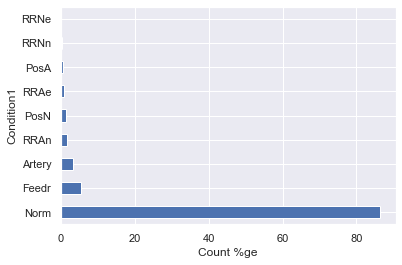

In [103]:
univariate_category_analysis(train, 'Condition1')

#### Condition2

Number of null values in Condition2 is: 0


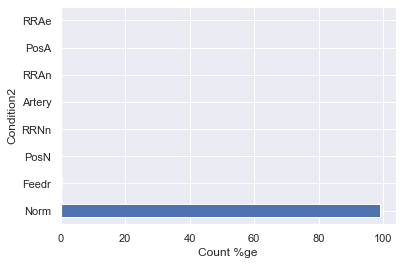

In [104]:
univariate_category_analysis(train, 'Condition2')

#### BldgType

Number of null values in BldgType is: 0


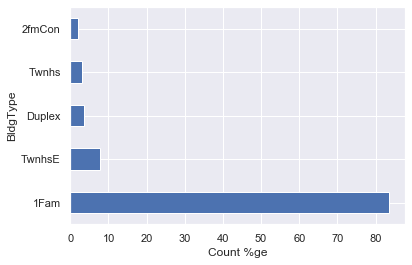

In [105]:
univariate_category_analysis(train, 'BldgType')

#### HouseStyle

Number of null values in HouseStyle is: 0


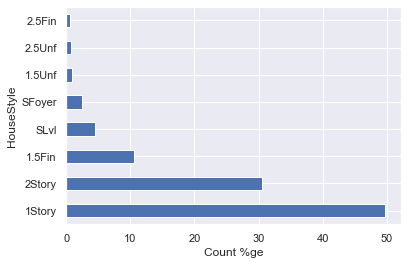

In [106]:
univariate_category_analysis(train, 'HouseStyle')

#### OverallQual

Number of null values in OverallQual is: 0


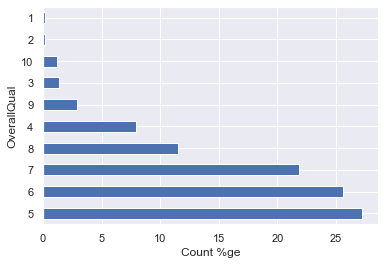

In [107]:
univariate_category_analysis(train, 'OverallQual')

#### OverallCond

Number of null values in OverallCond is: 0


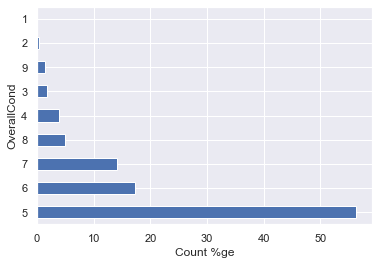

In [108]:
univariate_category_analysis(train, 'OverallCond')

#### RoofStyle

Number of null values in RoofStyle is: 0


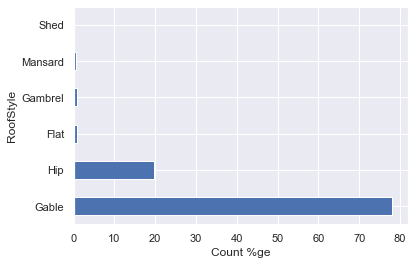

In [109]:
univariate_category_analysis(train, 'RoofStyle')

#### RoofMatl

Number of null values in RoofMatl is: 0


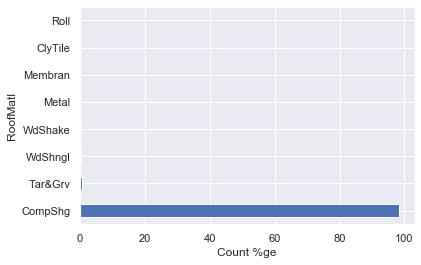

In [110]:
univariate_category_analysis(train, 'RoofMatl')

#### Exterior1st

Number of null values in Exterior1st is: 0


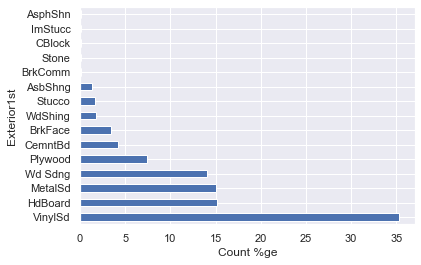

In [111]:
univariate_category_analysis(train, 'Exterior1st')

#### Exterior2nd

Number of null values in Exterior2nd is: 0


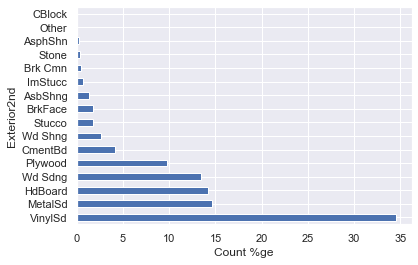

In [112]:
univariate_category_analysis(train, 'Exterior2nd')

#### MasVnrType

Number of null values in MasVnrType is: 8


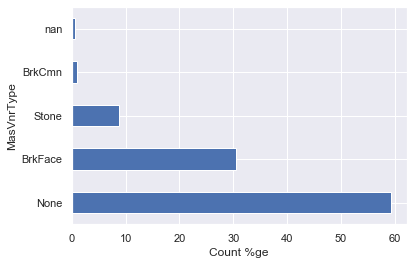

In [113]:
univariate_category_analysis(train, 'MasVnrType')

#### ExterQual

Number of null values in ExterQual is: 0


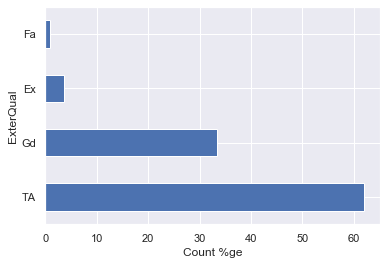

In [114]:
univariate_category_analysis(train, 'ExterQual')

#### ExterCond

Number of null values in ExterCond is: 0


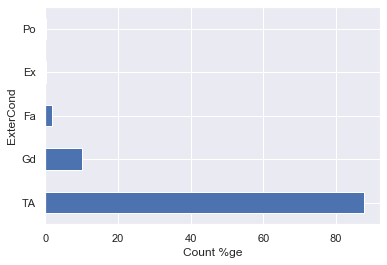

In [115]:
univariate_category_analysis(train, 'ExterCond')

#### Foundation

Number of null values in Foundation is: 0


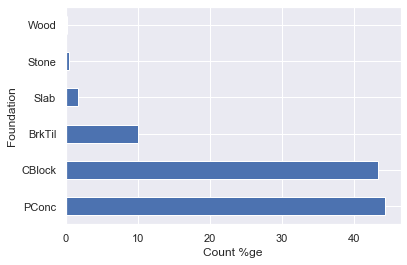

In [116]:
univariate_category_analysis(train, 'Foundation')

#### BsmtQual

Number of null values in BsmtQual is: 37


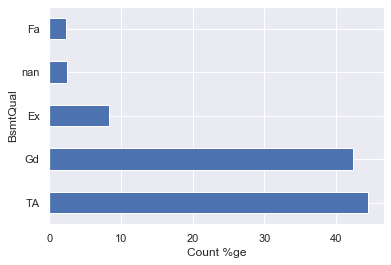

In [117]:
univariate_category_analysis(train, 'BsmtQual')

#### BsmtCond

Number of null values in BsmtCond is: 37


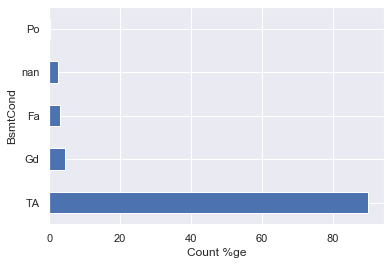

In [118]:
univariate_category_analysis(train, 'BsmtCond')

#### BsmtExposure

Number of null values in BsmtExposure is: 38


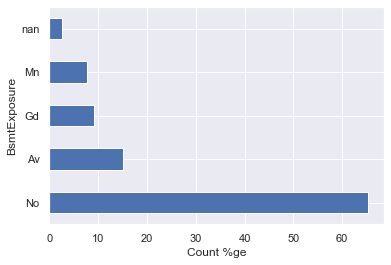

In [119]:
univariate_category_analysis(train, 'BsmtExposure')

#### BsmtFinType1

Number of null values in BsmtFinType1 is: 37


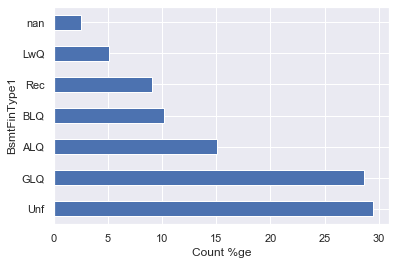

In [120]:
univariate_category_analysis(train, 'BsmtFinType1')

#### BsmtFinType2

Number of null values in BsmtFinType2 is: 38


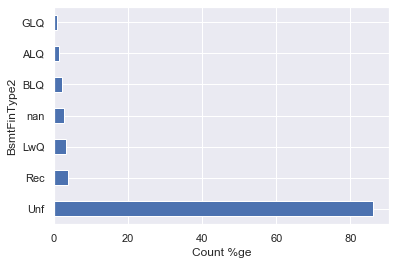

In [121]:
univariate_category_analysis(train, 'BsmtFinType2')

#### Heating

Number of null values in Heating is: 0


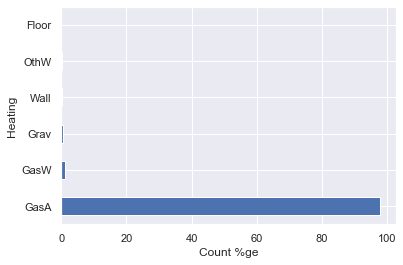

In [122]:
univariate_category_analysis(train, 'Heating')

#### HeatingQC

Number of null values in HeatingQC is: 0


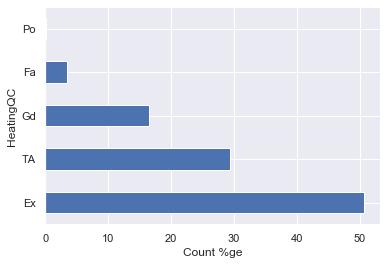

In [123]:
univariate_category_analysis(train, 'HeatingQC')

#### CentralAir

Number of null values in CentralAir is: 0


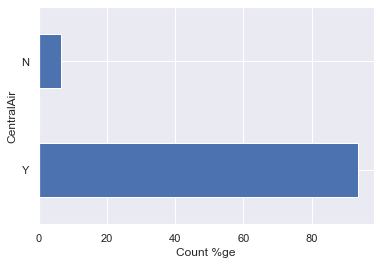

In [124]:
univariate_category_analysis(train, 'CentralAir')

#### Electrical

Number of null values in Electrical is: 1


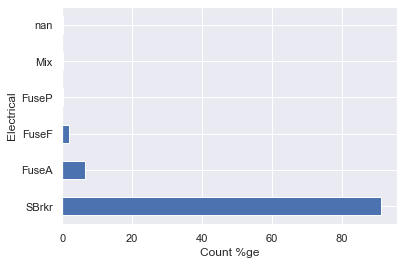

In [125]:
univariate_category_analysis(train, 'Electrical')

#### BsmtFullBath

In [126]:
train['BsmtFullBath'].unique()

[1, 0, 2, 3]
Categories (4, int64): [1, 0, 2, 3]

Number of null values in BsmtFullBath is: 0


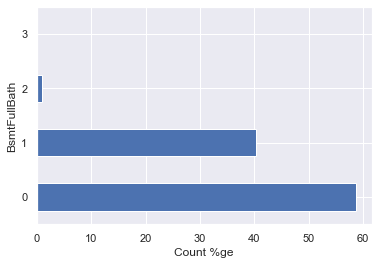

In [127]:
univariate_category_analysis(train, 'BsmtFullBath')

#### BsmtHalfBath

Number of null values in BsmtHalfBath is: 0


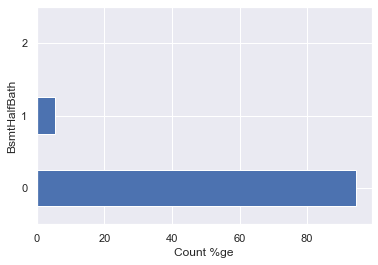

In [128]:
univariate_category_analysis(train, 'BsmtHalfBath')

#### FullBath

Number of null values in FullBath is: 0


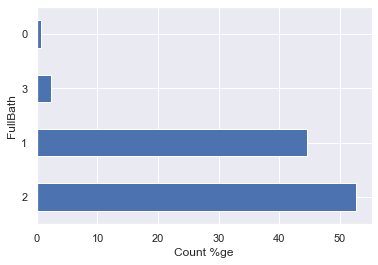

In [129]:
univariate_category_analysis(train, 'FullBath')

#### HalfBath

Number of null values in HalfBath is: 0


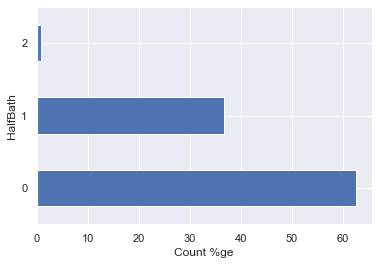

In [130]:
univariate_category_analysis(train, 'HalfBath')

#### BedroomAbvGr

Number of null values in BedroomAbvGr is: 0


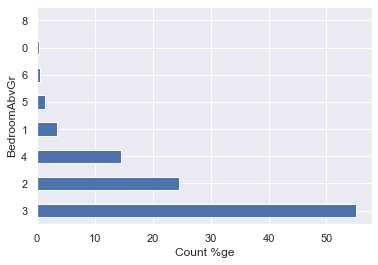

In [131]:
univariate_category_analysis(train, 'BedroomAbvGr')

#### KitchenAbvGr

Number of null values in KitchenAbvGr is: 0


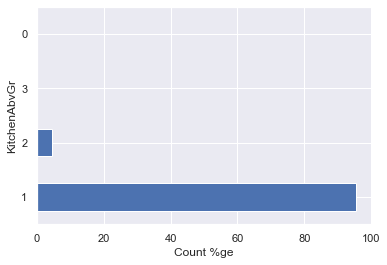

In [132]:
univariate_category_analysis(train, 'KitchenAbvGr')

#### KitchenQual

Number of null values in KitchenQual is: 0


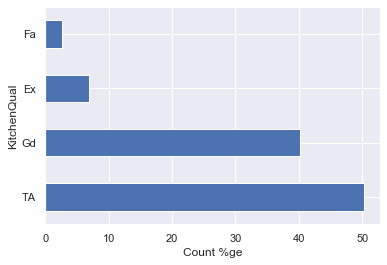

In [133]:
univariate_category_analysis(train, 'KitchenQual')

#### Functional

Number of null values in Functional is: 0


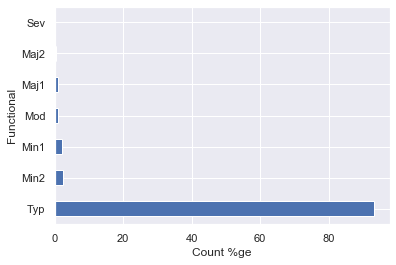

In [134]:
univariate_category_analysis(train, 'Functional')

#### FireplaceQu

Number of null values in FireplaceQu is: 690


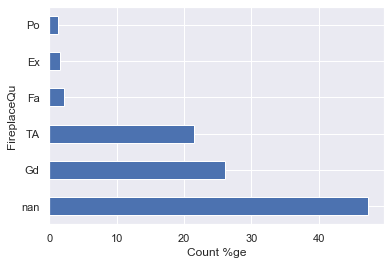

In [135]:
univariate_category_analysis(train, 'FireplaceQu')

#### GarageType

Number of null values in GarageType is: 81


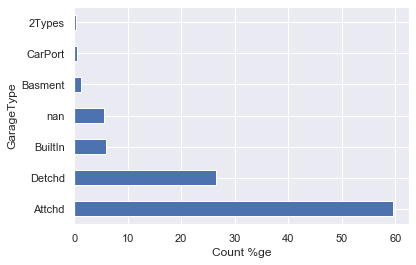

In [136]:
univariate_category_analysis(train, 'GarageType')

#### GarageFinish

Number of null values in GarageFinish is: 81


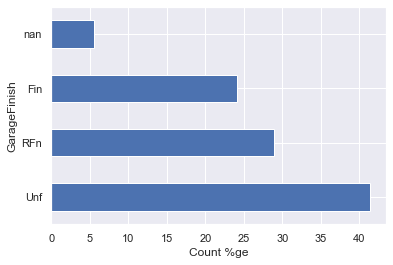

In [137]:
univariate_category_analysis(train, 'GarageFinish')

#### GarageQual

Number of null values in GarageQual is: 81


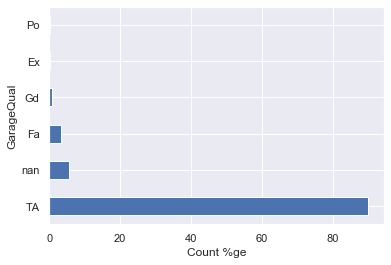

In [138]:
univariate_category_analysis(train, 'GarageQual')

#### GarageCond

Number of null values in GarageCond is: 81


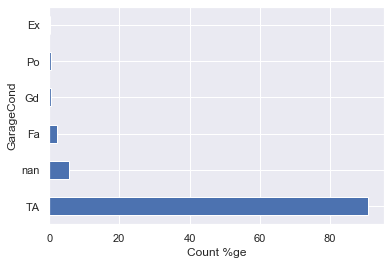

In [139]:
univariate_category_analysis(train, 'GarageCond')

#### PavedDrive

Number of null values in PavedDrive is: 0


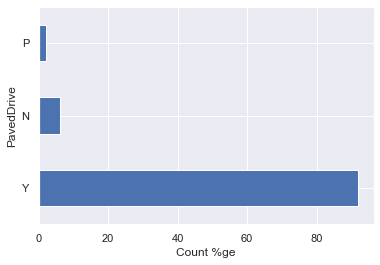

In [140]:
univariate_category_analysis(train, 'PavedDrive')

#### PoolQC

Number of null values in PoolQC is: 1453


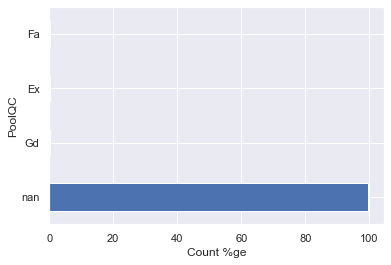

In [141]:
univariate_category_analysis(train, 'PoolQC')

#### Fence

Number of null values in Fence is: 1179


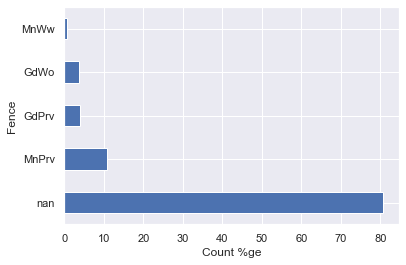

In [142]:
univariate_category_analysis(train, 'Fence')

#### MiscFeature

Number of null values in MiscFeature is: 1406


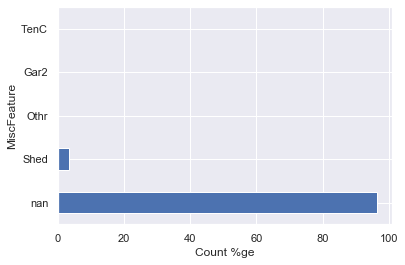

In [143]:
univariate_category_analysis(train, 'MiscFeature')

#### SaleType

Number of null values in SaleType is: 0


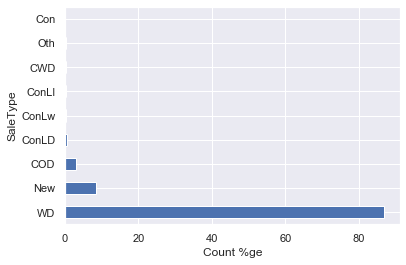

In [144]:
univariate_category_analysis(train, 'SaleType')

#### SaleCondition

Number of null values in SaleCondition is: 0


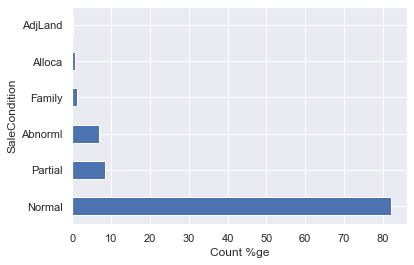

In [145]:
univariate_category_analysis(train, 'SaleCondition')

### 2.b Data wrangling to do after univariate categorical analysis

In [146]:
list_of_object_category_columns_with_null_values

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [147]:
len(list_of_object_category_columns_with_null_values)

16

#### Category column which has NA value

In [148]:
train[['MasVnrType', 'Electrical']].isnull().sum()

MasVnrType    8
Electrical    1
dtype: int64

In [149]:
test[['MasVnrType', 'Electrical']].isnull().sum()

MasVnrType    16
Electrical     0
dtype: int64

In [150]:
for col in ['MasVnrType', 'Electrical']:
    train[col] = train[col].fillna(train[col].value_counts().index[0])
    test[col] = test[col].fillna(train[col].value_counts().index[0])

Categorical columns which have NA and is a valid value and must be filled with None

In [151]:
for col in ['Alley', 'GarageType', 'GarageFinish','MiscFeature']:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

Categorical columns which have NA and is a valid value and must be filled with None - Ordinal

In [152]:
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure',  'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
            'GarageQual', 'PoolQC','Fence', 'GarageCond']:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

In [153]:
test[test.select_dtypes(include = ['object','category']).columns.to_list()].isnull().sum()[test[test.select_dtypes(include = ['object','category']).columns.to_list()].isnull().sum()!=0]

MSZoning       4
Utilities      2
Exterior1st    1
Exterior2nd    1
KitchenQual    1
Functional     2
SaleType       1
dtype: int64

In [154]:
test['MSZoning'] = test['MSZoning'].fillna(train['MSZoning'].value_counts().index[0])
test['Utilities'] = test['Utilities'].fillna(train['Utilities'].value_counts().index[0])
test['GarageCond'] = test['GarageCond'].fillna('None')
test['SaleType'] = test['SaleType'].fillna(train['SaleType'].value_counts().index[0])
test['Functional'] = test['Functional'].fillna(train['Functional'].value_counts().index[0])
test['KitchenQual'] = test['KitchenQual'].fillna(train['KitchenQual'].value_counts().index[0])
test['Exterior1st'] = test['Exterior1st'].fillna(train['Exterior1st'].value_counts().index[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(train['Exterior2nd'].value_counts().index[0])

Checking for presence of null in both train and test dataset

In [155]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [156]:
test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [157]:
train.shape

(1460, 81)

In [158]:
test.shape

(1459, 80)

Converting object columns to nominal category type

In [159]:
for col in ['Alley', 'GarageType', 'GarageFinish','MiscFeature', 'Exterior1st', 'Exterior2nd']:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

Converting object columns to ordinal category type

In [160]:
cat_type = CategoricalDtype(['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)
for col in ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual']:
#     train[col] = train[col].astype(cat_type)
    train[col+'_ordinal_encoded'] = train[col].astype(cat_type).cat.codes
    train.drop(columns = col, inplace = True)
    test[col+'_ordinal_encoded'] = test[col].astype(cat_type)
    test.drop(columns = col, inplace = True)

In [161]:
cat_type = CategoricalDtype(['IR3', 'IR2', 'IR1', 'Reg'], ordered=True)
train['LotShape'+'_ordinal_encoded'] = train['LotShape'].astype(cat_type).cat.codes
train.drop(columns = ['LotShape'], inplace = True)
test['LotShape'+'_ordinal_encoded'] = test['LotShape'].astype(cat_type)
test['LotShape'].drop(columns = ['LotShape'], inplace = True)

In [162]:
cat_type = CategoricalDtype(['None', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)
train['PoolQC'+'_ordinal_encoded'] = train['PoolQC'].astype(cat_type).cat.codes
train.drop(columns = ['PoolQC'], inplace = True)
test['PoolQC'+'_ordinal_encoded'] = test['PoolQC'].astype(cat_type)
test.drop(columns = ['PoolQC'], inplace = True)

In [ ]:
cat_type = CategoricalDtype(['None', 'No', 'Mn', 'Av', 'Gd'], ordered=True)
train['BsmtExposure'+'_ordinal_encoded'] = train['BsmtExposure'].astype(cat_type).cat.codes
train.drop(columns = ['BsmtExposure'], inplace = True)
test['BsmtExposure'] = test['BsmtExposure'].astype(cat_type)

In [163]:
cat_type = CategoricalDtype(['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], ordered=True)
for col in ['BsmtFinType2', 'BsmtFinType1']:
    train[col+'_ordinal_encoded'] = train[col].astype(cat_type).cat.codes
    train.drop(columns = [col], inplace = True)
    test[col+'_ordinal_encoded'] = test[col].astype(cat_type)
    test.drop(columns = [col], inplace = True)

Remove the ID column from the dataframe as they are not of much use for modelling

In [164]:
train.drop(columns = 'Id', inplace = True)
test.drop(columns = 'Id', inplace = True)

## 3. Bivariate Analysis

In [165]:
train['SalePrice_Log'] = np.log(train['SalePrice'])

In [166]:
train.drop(columns = 'SalePrice', inplace = True)

Creating a list of columns that can be converted into log types. Checked that based on the values in the respective columns in the dataframe like:
- whether they have lots of zero values or year/month - If this happens dont consider the column for log transformation
- Skew or kurtosis have high value - Them select that column for log transformation
> ['GrLivArea', '1stFlrSF', 'BsmtUnfSF', 'LotArea', 'LotFrontage']

In [167]:
# to check for presence of zero in each columns as log(0) is undefined and will cause error
def count_check_zeros(t):
    return(sum(t==0))
        
train[['GrLivArea', '1stFlrSF', 'BsmtUnfSF', 'LotArea', 'LotFrontage']].apply(count_check_zeros, axis = 0)

GrLivArea        0
1stFlrSF         0
BsmtUnfSF      118
LotArea          0
LotFrontage      0
dtype: int64

Wont be changing __BsmtUnfSF__ column as it has zero values

In [168]:
for col in ['GrLivArea', '1stFlrSF', 'LotArea', 'LotFrontage']:
    train[col+'_Log'] = np.log(train[col])
    test[col+'_Log'] = np.log(train[col])
    test.drop(columns = col, inplace = True)
    train.drop(columns = col, inplace = True)

Plot of relation of target variable to other variables

In [169]:
numeric_dtypes = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = list(train.select_dtypes(include = numeric_dtypes).columns)
# numerical_columns.remove('SalePrice_Log')

In [170]:
len(numerical_columns)

38

In [171]:
from scipy.stats import pearsonr

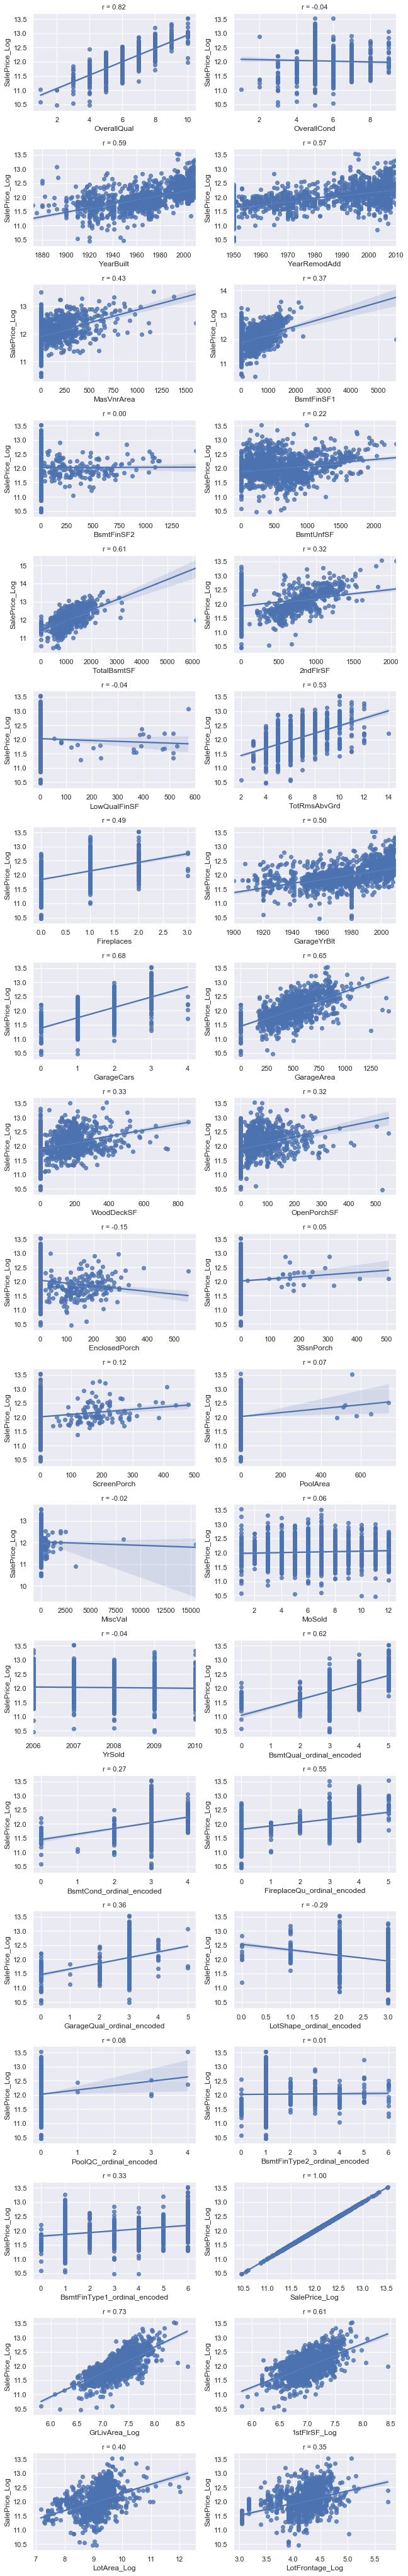

In [173]:
correlation_results_list = []
nr_rows = 19
nr_cols = 2
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4.5,nr_rows*3))
i = 0
for r in range(nr_rows):
    for c in range(nr_cols):
        col = numerical_columns[i]
        sns.regplot(train[col], train['SalePrice_Log'], ax = axs[r][c])
        stp = pearsonr(train[col], train['SalePrice_Log'])
        i+=1
        str_title = "r = " + "{0:.2f}".format(stp[0])
        axs[r][c].set_title(str_title,fontsize=11)
        correlation_results_list.append((col, abs(stp[0])))

plt.tight_layout(); 
plt.show();

For charting the regplot and better use the other method of subplots and axis learnt.

In [174]:
correlation_df = pd.DataFrame(correlation_results_list, columns = ['column', 'correlation'])
del(correlation_results_list)
correlation_df

,column,correlation
0,OverallQual,0.817184
1,OverallCond,0.036868
2,YearBuilt,0.586570
3,YearRemodAdd,0.565608
4,MasVnrArea,0.426775
5,BsmtFinSF1,0.372023
6,BsmtFinSF2,0.004832
7,BsmtUnfSF,0.221985
8,TotalBsmtSF,0.612134
9,2ndFlrSF,0.319300


In [175]:
# columns with correlation greater than 0.4
correlation_df[correlation_df.correlation > 0.4] 

,column,correlation
0,OverallQual,0.817184
2,YearBuilt,0.586570
3,YearRemodAdd,0.565608
4,MasVnrArea,0.426775
8,TotalBsmtSF,0.612134
11,TotRmsAbvGrd,0.534422
12,Fireplaces,0.489449
13,GarageYrBlt,0.495794
14,GarageCars,0.680625
15,GarageArea,0.650888


In [176]:
# columns with correlation less than 0.4 and those which will be dropped
correlation_df[correlation_df.correlation < 0.4] 

,column,correlation
1,OverallCond,0.036868
5,BsmtFinSF1,0.372023
6,BsmtFinSF2,0.004832
7,BsmtUnfSF,0.221985
9,2ndFlrSF,0.319300
10,LowQualFinSF,0.037963
16,WoodDeckSF,0.334135
17,OpenPorchSF,0.321053
18,EnclosedPorch,0.149050
19,3SsnPorch,0.054900


Dropping list of columns 

In [177]:
# list of columns to be dropped
train.drop(columns = correlation_df[correlation_df.correlation < 0.4].column.to_list(), inplace = True)
test.drop(columns = correlation_df[correlation_df.correlation < 0.4].column.to_list(), inplace = True)
train.head()

,MSSubClass,MSZoning,Street,Alley,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtExposure,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,Fence,MiscFeature,SaleType,SaleCondition,BsmtQual_ordinal_encoded,FireplaceQu_ordinal_encoded,SalePrice_Log,GrLivArea_Log,1stFlrSF_Log
0,60,RL,Pave,None,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,No,856,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,Y,None,None,WD,Normal,4,0,12.247694,7.444249,6.752270
1,20,RL,Pave,None,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,1262,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,Y,None,None,WD,Normal,4,3,12.109011,7.140453,7.140453
2,60,RL,Pave,None,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Mn,920,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,Y,None,None,WD,Normal,4,3,12.317167,7.487734,6.824374
3,70,RL,Pave,None,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,No,756,GasA,Gd,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,Y,None,None,WD,Abnorml,3,4,11.849398,7.448334,6.867974
4,60,RL,Pave,None,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Av,1145,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,Y,None,None,WD,Normal,4,3,12.429216,7.695303,7.043160


Create a heatmap to show the correlation between the different categorical variables.

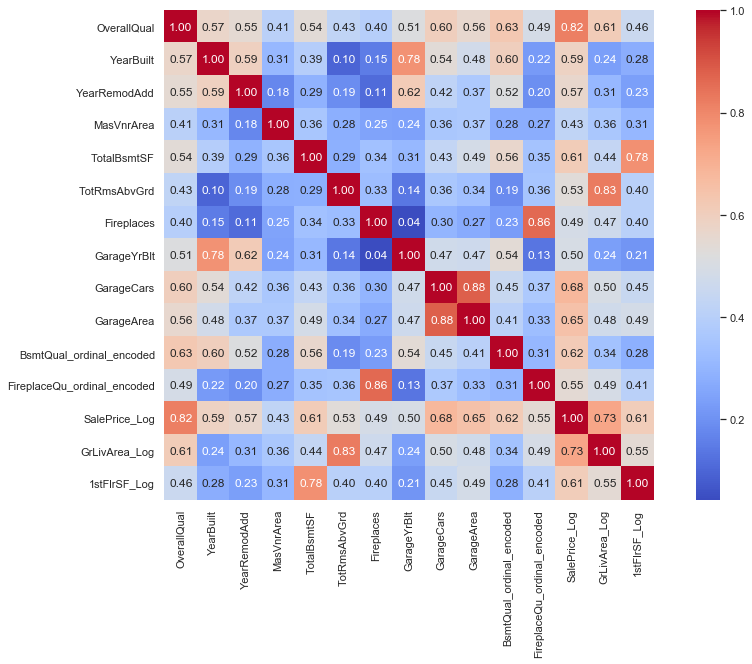

In [178]:
plt.figure(figsize=(15,9))
sns.heatmap(train.corr(), annot=True, fmt = '.2f', cmap='coolwarm', square = True);

### Dropping columns having high value of correlation to avoid multicolinearity

Columns with high correlation i.e., more than 0.8:
- TotRmsAbvGrd and GrLivArea_Log
- GarageArea and GarageCars
- Fireplaces and FireplaceQu_ordinal_encoded

In [179]:
train.drop(columns = ['TotRmsAbvGrd', 'GarageArea', 'Fireplaces'], inplace = True)
test.drop(columns = ['TotRmsAbvGrd', 'GarageArea',  'Fireplaces'], inplace = True)

## Bivariate analysis of categorical and numerical variables

In [180]:
train.select_dtypes(include = ['category', 'object']).columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtExposure', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [181]:
len(train.select_dtypes(include = ['category', 'object']).columns)

42

In [182]:
object_category_columns = train.select_dtypes(include = ['category', 'object']).columns.to_list()

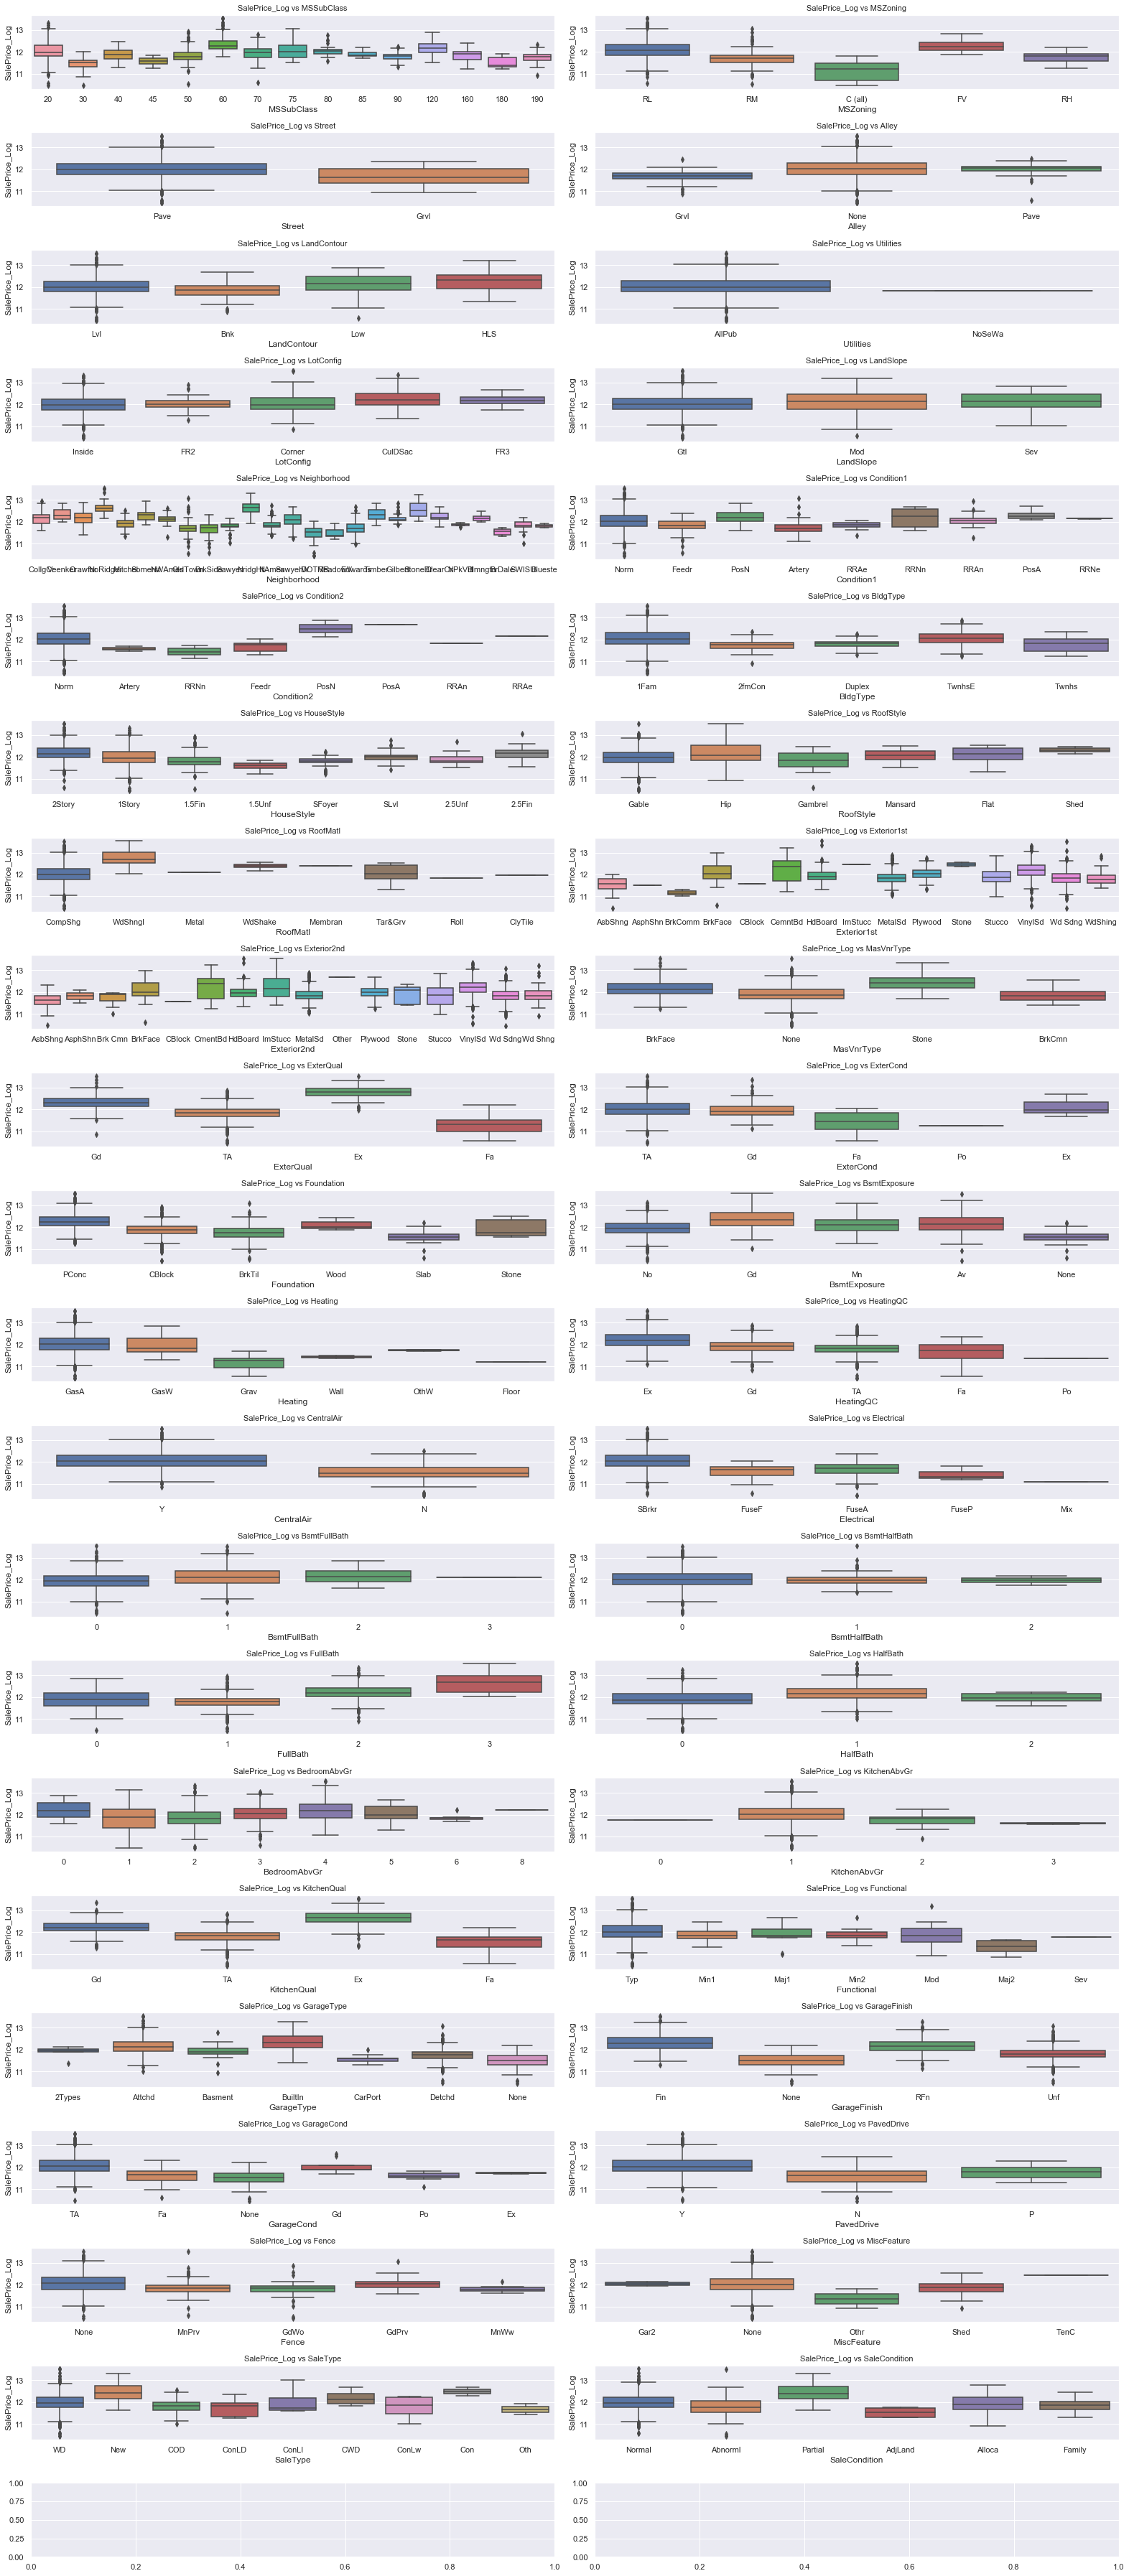

In [183]:
nrows = 22
ncols = 2
fig, axes = plt.subplots(nrows,ncols, figsize=(22,50))
axes_list = [item for sublist in axes for item in sublist]
for col in train.select_dtypes(include = ['category', 'object']).columns:
    ax = axes_list.pop(0) # Take the first axes of the axes_list
    sns.boxplot(train[col], train['SalePrice_Log'], ax = ax)
    str_title = "SalePrice_Log vs {}".format(col)
    ax.set_title(str_title,fontsize=11)

plt.tight_layout(); 
plt.show();
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

##### SaleCondition and SalePrice_Log

In [184]:
df_sst = len(train['SalePrice_Log'])-1
df_ssb = train['SaleCondition'].nunique() - 1
df_ssw = df_sst - df_ssb

calculate f-critical

In [185]:
from scipy.stats import f
F_critical = f.ppf(0.95, df_ssb, df_ssw)

In [186]:
F_critical

2.220253004925625

In [187]:
from scipy.stats import f_oneway
result_anova = f_oneway(train.loc[train.SaleCondition=='Normal', 'SalePrice_Log'],
                       train.loc[train.SaleCondition=='Abnorml', 'SalePrice_Log'],
                       train.loc[train.SaleCondition=='AdjLand', 'SalePrice_Log'],
                       train.loc[train.SaleCondition=='Alloca', 'SalePrice_Log'],
                       train.loc[train.SaleCondition=='Family', 'SalePrice_Log'],
                       train.loc[train.SaleCondition=='Partial', 'SalePrice_Log'],)
result_anova

F_onewayResult(statistic=43.07671153765693, pvalue=1.6897076360291514e-41)

As p-value is less than  0.05 so we can reject the null hypothesis and assume that Salecondition has a huge impact on the SalePrice_Log. And F-statistic > F_critical so the different groups in SaleCondition has an impact on the SalePrice_Log.

##### SaleType

In [188]:
def find_f_critical(categ_col, num_col='SalePrice_Log', df = train):
    df_sst = len(df[num_col])-1
    df_ssb = df[categ_col].nunique() - 1
    df_ssw = df_sst - df_ssb
    F_critical = f.ppf(0.95, df_ssb, df_ssw)
    print("F_Critical for col: ",F_critical)

In [189]:
train['SaleType'].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [190]:
find_f_critical('SaleType')

F_Critical for col:  1.944772855332636


In [191]:
result_anova = f_oneway(train.loc[train.SaleType=='WD', 'SalePrice_Log'],
                       train.loc[train.SaleType=='New', 'SalePrice_Log'],
                       train.loc[train.SaleType=='COD', 'SalePrice_Log'],
                       train.loc[train.SaleType=='ConLD', 'SalePrice_Log'],
                       train.loc[train.SaleType=='CWD', 'SalePrice_Log'],
                       train.loc[train.SaleType=='ConLI', 'SalePrice_Log'],
                       train.loc[train.SaleType=='ConLw', 'SalePrice_Log'],
                       train.loc[train.SaleType=='Con', 'SalePrice_Log'],
                       train.loc[train.SaleType=='Oth', 'SalePrice_Log'])
result_anova

F_onewayResult(statistic=24.759990153786983, pvalue=5.497893082953038e-36)

So, F_statistic>F_critical so there is huge association between these due to high value of F.

##### 'MiscFeature'

In [192]:
train['MiscFeature'].unique()

[None, Shed, Gar2, Othr, TenC]
Categories (5, object): [None, Shed, Gar2, Othr, TenC]

In [193]:
find_f_critical('MiscFeature')

F_Critical for col:  2.3780442396567194


In [194]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
results = ols('SalePrice_Log ~MiscFeature', data = train).fit()
aov_table = sm.stats.anova_lm(results, typ = 1)  
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
MiscFeature,4.0,2.294753,0.573688,3.621236,0.00606
Residual,1455.0,230.505906,0.158423,NaN,NaN


In [195]:
global categ_columns_with_high_association, categ_columns_with_low_association
categ_columns_with_high_association = []
categ_columns_with_low_association = []
def perform_anova_and_its_results(categ_col, num_col='SalePrice_Log', df = train):
    df_sst = len(df[num_col])-1
    df_ssb = df[categ_col].nunique() - 1
    df_ssw = df_sst - df_ssb
    F_critical = f.ppf(0.95, df_ssb, df_ssw)
    print("F_Critical: {0:.3f}".format(F_critical))
    results = ols('{} ~{}'.format(num_col, categ_col), data = train).fit()
    aov_table = sm.stats.anova_lm(results, typ = 1)  
    F_stat = aov_table.loc[categ_col, 'F']
    print("F_statistic: {0:.3f}".format(F_stat))
    if (F_stat > F_critical):
        print("F-statistic is more than F-critical")
        print("There is an association between {} and {}".format(categ_col,num_col))
        categ_columns_with_high_association.append(categ_col)
    else:
        print("F-statistic is less than F-critical")
        print("There is no association between {} and {}".format(categ_col,num_col))
        categ_columns_with_low_association.append(categ_col)
    print('-'*30)

In [196]:
perform_anova_and_its_results('MiscFeature')

F_Critical: 2.378
F_statistic: 3.621
F-statistic is more than F-critical
There is an association between MiscFeature and SalePrice_Log
------------------------------


##### Fence

In [197]:
perform_anova_and_its_results('Fence')

F_Critical: 2.378
F_statistic: 16.103
F-statistic is more than F-critical
There is an association between Fence and SalePrice_Log
------------------------------


In [198]:
train['Fence'].unique()

array(['None', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

To find categorical columns having good association with SalePrice_Log

In [199]:
object_category_columns = train.select_dtypes(include = ['category', 'object']).columns.to_list()

In [200]:
for col in object_category_columns:
    perform_anova_and_its_results(col)

F_Critical: 1.699
F_statistic: 50.866
F-statistic is more than F-critical
There is an association between MSSubClass and SalePrice_Log
------------------------------
F_Critical: 2.378
F_statistic: 77.608
F-statistic is more than F-critical
There is an association between MSZoning and SalePrice_Log
------------------------------
F_Critical: 3.848
F_statistic: 4.814
F-statistic is more than F-critical
There is an association between Street and SalePrice_Log
------------------------------
F_Critical: 3.002
F_statistic: 20.706
F-statistic is more than F-critical
There is an association between Alley and SalePrice_Log
------------------------------
F_Critical: 2.611
F_statistic: 12.767
F-statistic is more than F-critical
There is an association between LandContour and SalePrice_Log
------------------------------
F_Critical: 3.848
F_statistic: 0.233
F-statistic is less than F-critical
There is no association between Utilities and SalePrice_Log
------------------------------
F_Critical: 2.378

In [201]:
categ_columns_with_high_association

['MiscFeature',
 'Fence',
 'MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtExposure',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [202]:
categ_columns_with_low_association

['Utilities', 'LandSlope', 'BsmtHalfBath']

As these columns in `categ_columns_with_low_association` wont have association with SalePrice_Log so dropping these columns from train and test datas.



In [203]:
train.drop(columns = categ_columns_with_low_association, inplace = True)

In [204]:
test.drop(columns=categ_columns_with_low_association, inplace = True)

In [205]:
train.shape

(1460, 51)

In [206]:
test.shape

(1459, 51)

In [207]:
train.columns[~train.columns.isin(test.columns)]

Index(['SalePrice_Log'], dtype='object')

In [222]:
test.drop(columns = 'LotShape', inplace = True)

In [221]:
train = train[train.columns[train.columns!='SalePrice_Log'].to_list() + ['SalePrice_Log']]

In [223]:
test = test.loc[:,test.columns.sort_values().to_list()]

In [224]:
train.shape

(1460, 51)

In [225]:
test.shape

(1459, 50)

In [229]:
unique_elements_dict = {}
for col in train.select_dtypes(include=['category', 'object']):
    unique_elements_dict[col] = pd.Series(train[col].unique()).to_list()

In [231]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, OneHotEncoder

In [236]:
t_k = []
t_v = []
for k,v in unique_elements_dict.items():
    t_k.append(k)
    t_v.append(v)
    

In [247]:
temp = train.select_dtypes(include=numeric_dtypes).columns.to_list()
temp.remove('SalePrice_Log')

In [250]:
colT = ColumnTransformer([
    ('dummy_col',OneHotEncoder(categories = t_v), t_k),
    ('norm', Normalizer(norm='l1'), temp) 
])

In [251]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model  import LinearRegression

In [257]:
regressor = LinearRegression()

In [252]:
X = train.loc[:,train.columns[train.columns!='SalePrice_Log']]
y = train['SalePrice_Log']

In [258]:
cross_val_score(regressor,X,y,cv=10,scoring='neg_root_mean_squared_error')

C:\Software_installations\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RM'

  FitFailedWarning)
C:\Software_installations\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RL'

  FitFailedWarning)
C:\Software_installations\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RL'

  FitFailedWarning)
C:\Software_installations\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: Fit

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

- To see the valid scoring values to be used in cross validation: [check this link](https://scikit-learn.org/stable/modules/model_evaluation.html)
- And to see the valid metrics that can be used here use the following code:
```
import sklearn
sorted(sklearn.metrics.SCORERS.keys())
```